In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def isodd(n):
    return divmod(n,2)[1] == 1
def iseven(n):
    return divmod(n,2)[1] == 0
for i in range(10):
    print(i,isodd(i),iseven(i))

0 False True
1 True False
2 False True
3 True False
4 False True
5 True False
6 False True
7 True False
8 False True
9 True False


## Problem 2

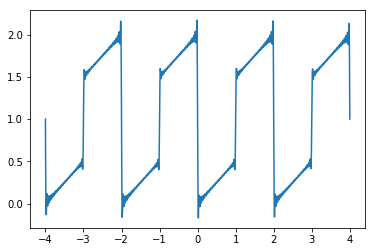

In [9]:
def a(n):
    if n == 0:
        return 2
    else:
        return 0
def b(n):
    if isodd(n):
        return -3/(n*np.pi)
    else:
        return -1/(n*np.pi)

def plotseries(n):
    x = np.linspace(-4,4,1000)
    y = np.zeros_like(x)
    for i in range(0,n+1):
        if i == 0:
            y = y + (1/2)*a(0)
        else:
            y = y + a(i)*np.cos(i*np.pi*x)
            y = y + b(i)*np.sin(i*np.pi*x)
    plt.plot(x,y)
plotseries(50)

In [ ]:
def a(n):
    if n == 0:
        return 0
    else:
        return 0
def b(n):
    if isodd(n):
        return -1/n
    else:
        return 0
def plotseries(n):
    x = np.linspace(-4,4,1000)
    y = np.zeros_like(x)
    for i in range(0,n+1):
        if i == 0:
            y = y + (1/2)*a(0)
        else:
            y = y + a(i)*np.cos(i*np.pi*x)
            y = y + b(i)*np.sin(i*np.pi*x)
    plt.plot(x,y)
    plt.ylim(-2,2)
plotseries(400)

## Series solution

In [131]:
def an(n):
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return an(n-2)*(4*(n-2) - 1)/(((n-2)+1)*((n-2)+2))

In [132]:
def y0(x,n):
    result = np.zeros_like(x)
    for i in range(0,n+1,2):
        result = result + an(i)*x**i
    return result

def y1(x,n):
    result = np.zeros_like(x)
    for i in range(1,n+1,2):
        result = result + an(i)*x**i
    return result

In [133]:
def ploty0(n=0):
    x = np.linspace(-10,10,1000)
    y = y0(x,n)
    plt.plot(x,y)
    plt.ylim(-10,10)
def ploty1(n=0):
    x = np.linspace(-10,10,1000)
    y = y1(x,n)
    plt.plot(x,y)
    plt.ylim(-10,10)
def plotboth(n=0):
    ploty0(n)
    ploty1(n)

In [134]:
from ipywidgets import interact

In [136]:
interact(plotboth,n=(0,300))

interactive(children=(IntSlider(value=0, description='n', max=300), Output()), _dom_classes=('widget-interact',))

<function __main__.plotboth>

## Plotting power series

We want the power series for $\sin(x^2)$. First, let's just plot the function to see what we're approximating

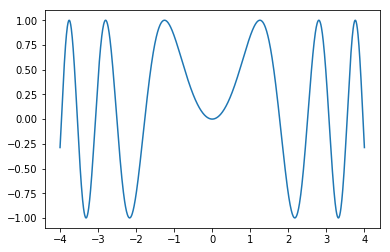

In [10]:
x = np.linspace(-4,4,1000)
plt.plot(x,np.sin(x**2))


Our solution looks like it has terms
$$\frac{(-1)^n x^{4n+2}}{(2n+1)!}$$
We want to write that as a series with coeffients for the $x^n$ term, so let's let $m=4n+2$. Then $n = (m-2)/4$. And, since $n$ starts at zero, $m$ starts at 2, and goes 2, 6, 10, ... We then get

$$\frac{(-1)^{(m-2)/4} x^{m}}{(2((m-2)/4)+1)!}$$

In [11]:
from scipy.special import factorial

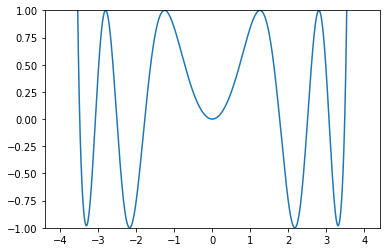

In [41]:
def a_n(n):
    non_zeros = [(4*i+2) for i in range(100)]
    if n not in non_zeros:
        return 0
    exponent = 1 + ((n/2) + 1)/2
    an = ((-1)**(exponent))/factorial(n/2)
    return an
def plotseries(n):
    x = np.linspace(-4,4,1000)
    y = np.zeros_like(x)
    for m in range(n+1):
        y = y + a_n(m)*x**m
    plt.plot(x,y)
    plt.ylim(-1,1)
plotseries(60)

In [28]:
-1/(6*5*4*3*2)

-0.001388888888888889